In [1]:
from IPython.display import Image
Image(url='http://python.org/images/python-logo.gif')


# IPython notebook


In [2]:
Image(url='http://ipython.org/_static/IPy_header.png')

In [3]:
Image(url='http://jupyter.org/images/jupyter-sq-text.svg', width=300, height=300)

# Jupyter
IPython will continue to exist as a Python kernel for Jupyter, but the notebook and other language-agnostic parts of IPython will move to new projects under the Jupyter name. IPython 3.0 will be the last monolithic release of IPython.

- Let's continue to call this IPython for now

# IPython
- interactive shell
- browser-based notebook (this)
- 'Kernel'
- great support for visualization library (eg. matplotlib)
- built on pyzmq, tornado

## IPython notebook
### Notebook == browser-based REPL
IPython Notebook is a web-based interactive computational environment for creating IPython notebooks. An IPython notebook is a JSON document containing an ordered list of input/output cells which can contain code, text, mathematics, plots and rich media.

## matplotlib
matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code, with familiar MATLAB APIs.

```py
plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')
plt.show()
```

## PySpark
Spark on Python, this serves as the Kernel, integrating with IPython
- Each notebook spins up a new instance of the Kernal (ie. PySpark running as the Spark Driver)

## Environment

- CentOS 6.5
- CDH 5.3.0 cluster
- Spark
- PySpark [(YARN client mode)](http://spark.apache.org/docs/latest/running-on-yarn.html)
- matplotlib and other packages installed


# Maxwell's Equations
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{align}


```Python
# Markdown code block
if not full:
    print 'eat more!'
```

In [4]:
import matplotlib
matplotlib.__version__

'1.4.3'

# Spark

In [1]:
print sys.version
print sc.version


VBox()

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Missing parentheses in call to 'print'. Did you mean print(sys.version)? (<stdin>, line 1)
  File "<stdin>", line 1
    print sys.version
            ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(sys.version)?



In [4]:
lines = sc.parallelize(['This is Bezos Jeff, not Jeff Bezos. Its fun to have fun,','but you have to know how.']) 
wordcounts = lines.map( lambda x: x.replace(',',' ').replace('.',' ').replace('-',' ').lower()) \
        .flatMap(lambda x: x.split()) \
        .map(lambda x: (x, 1)) \
        .reduceByKey(lambda x,y:x+y) \
        .map(lambda x:(x[1],x[0])) \
        .sortByKey(False) 
wordcounts.take(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(2, 'bezos'), (2, 'have'), (2, 'to'), (2, 'jeff'), (2, 'fun'), (1, 'but'), (1, 'you'), (1, 'how'), (1, 'this'), (1, 'is')]

In [3]:
pagecounts = sc.textFile('/user/fcheung/pagecounts') # HDFS
pagecounts.take(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error occurred while calling o154.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: hdfs://ip-10-0-1-35.ec2.internal:8020/user/fcheung/pagecounts
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:260)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:208)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:288)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:204)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:251)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:253)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:251)
	at scala.Op

In [8]:
enPages = pagecounts.filter(lambda x: x.split(" ")[1] == "en")
enPages.map(lambda x: x.split(" ")).map(lambda x: (x[2], int(x[3]))).reduceByKey(lambda x, y: x + y, 40).filter(lambda x: x[1] > 200000).map(lambda x: (x[1], x[0])).collect()
# This runs in the cluster

[(451126, u'Main_Page'), (1066734, u'404_error/'), (468159, u'Special:Search')]

# To be or not to be

In [9]:
words = sc.textFile('/user/fcheung/hamlet.txt')
words.take(5)

[u'', u'1604', u'', u'', u'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK']

In [10]:
import re
hamlet = words.flatMap(lambda line: re.split('\W+', line.lower().strip()))
hamlet.take(5)

[u'', u'1604', u'', u'', u'the']

In [11]:
tmp = hamlet.filter(lambda x: len(x) > 2 )
print tmp.take(5)

[u'1604', u'the', u'tragedy', u'hamlet', u'prince']


In [12]:
tmp = tmp.map(lambda word: (word, 1))
tmp.take(5)

[(u'1604', 1), (u'the', 1), (u'tragedy', 1), (u'hamlet', 1), (u'prince', 1)]

In [13]:
tmp = tmp.reduceByKey(lambda a, b: a + b)
tmp.take(5)
 

[(u'pardon', 9),
 (u'nunnery', 5),
 (u'lunacies', 1),
 (u'needful', 1),
 (u'foul', 12)]

In [14]:
tmp = tmp.map(lambda x: (x[1], x[0])).sortByKey(False)
tmp.take(20)

[(1091, u'the'),
 (969, u'and'),
 (558, u'you'),
 (405, u'that'),
 (358, u'ham'),
 (315, u'not'),
 (304, u'his'),
 (300, u'this'),
 (278, u'with'),
 (274, u'but'),
 (252, u'for'),
 (242, u'your'),
 (226, u'lord'),
 (219, u'what'),
 (203, u'king'),
 (197, u'him'),
 (183, u'have'),
 (173, u'will'),
 (132, u'are'),
 (125, u'all')]

In [15]:
tmp = tmp.map(lambda x: (x[1], x[0]))
tmp.take(20)

[(u'the', 1091),
 (u'and', 969),
 (u'you', 558),
 (u'that', 405),
 (u'ham', 358),
 (u'not', 315),
 (u'his', 304),
 (u'this', 300),
 (u'with', 278),
 (u'but', 274),
 (u'for', 252),
 (u'your', 242),
 (u'lord', 226),
 (u'what', 219),
 (u'king', 203),
 (u'him', 197),
 (u'have', 183),
 (u'will', 173),
 (u'are', 132),
 (u'all', 125)]

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(words):
    values = map(lambda x: x[1], words)
    labels = map(lambda x: x[0], words)
    plt.barh(range(len(values)), values, color='grey')
    plt.yticks(range(len(values)), labels)
    plt.show()

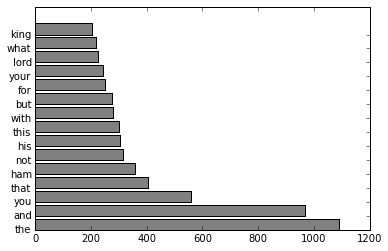

In [17]:
plot(tmp.take(15))

# Word vector
Word2Vec computes distributed vector representation of words. Distributed vector representation is showed to be useful in many natural language processing applications such as named entity recognition, disambiguation, parsing, tagging and machine translation.
https://code.google.com/p/word2vec/

Spark implements the Skip-gram approach. With Skip-gram we want to predict a window of words given a single word.

It was recently shown that the word vectors capture many linguistic regularities, for example vector operations vector('Paris') - vector('France') + vector('Italy') results in a vector that is very close to vector('Rome'), and vector('king') - vector('man') + vector('woman') is close to vector('queen') [3, 1].


## Data set
Wikipedia dump http://mattmahoney.net/dc/textdata  
`grep -o -E '\w+(\W+\w+){0,15}' text8 > text8_lines`  
then randomly sampled to ~200k lines



In [22]:
from pyspark.mllib.feature import Word2Vec

textpath = '/user/fcheung/text8_linessmall'
inp = sc.textFile(textpath).map(lambda row: row.split(" "))

word2vec = Word2Vec()
model = word2vec.fit(inp)

# This takes a while....

In [24]:
synonyms = model.findSynonyms('car', 40)

for word, cosine_distance in synonyms:
  print "{}: {}".format(word, cosine_distance)


driver: 0.717452287674
accident: 0.540586173534
pilot: 0.534710288048
cable: 0.533736109734
flying: 0.524660527706
marlin: 0.52224111557
slim: 0.515641212463
revolver: 0.512815892696
launched: 0.512356519699
serie: 0.511943757534
racing: 0.507736027241
geoff: 0.507051408291
mickey: 0.502854526043
engined: 0.496125161648
miniaturized: 0.495229810476
harrier: 0.49293076992
mclaren: 0.490967661142
rf: 0.48476678133
fighter: 0.482738018036
passenger: 0.480480760336
bomb: 0.476699143648
mctaggart: 0.474561154842
chase: 0.473450392485
race: 0.472357422113
crash: 0.472341090441
kirby: 0.472037523985
drunken: 0.471260607243
window: 0.470358043909
raf: 0.470099359751
button: 0.466545432806
factory: 0.46252438426
killer: 0.462217181921
shot: 0.461643457413
trainer: 0.459573149681
jockey: 0.456390231848
runner: 0.454748958349
mario: 0.454734921455
lane: 0.453607857227
singh: 0.453275740147
debuts: 0.451825499535


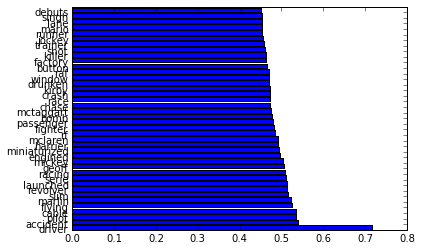

In [25]:
values = map(lambda x: x[1], synonyms)
labels = map(lambda x: x[0], synonyms)
plt.barh(range(len(values)), values, color='blue')
plt.yticks(range(len(values)), labels)
plt.show()


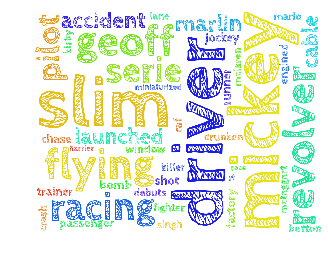

In [26]:
from wordcloud import WordCloud, STOPWORDS

words = " ".join([x[0] for x in synonyms for times in range(0, int(x[1]*10))])
 
wordcloud = WordCloud(font_path='/home/fcheung/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(words)
 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### wordcloud package uses PIL/Image
